In [1]:
'''
In this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with 
extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work.

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with
respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, 
identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset.


The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health 
concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a
subsidy for renewable energy in states observing an average AQI of 10 or above.

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). RRE operates in the following U.S. states: 
California, Florida, Michigan, Ohio, Pennsylvania, Texas. You've been tasked with constructing an analysis which identifies which of these states are most 
likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:

Q1. Provide a summary of the mean AQI for the states in which RRE operates.
Q2. Construct a boxplot visualization for AQI of these states using seaborn.
Q3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
Q4. Construct a confidence interval for the RRE state with the highest mean AQI.'''

"\nIn this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with \nextremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work.\n\nFor this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with\nrespect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, \nidentified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset.\n\n\nThe Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health \nconcern, while higher values are associated with increased risk to public health. The United States is considering a new f

In [5]:
# Import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [6]:
# Load data

epa_data = pd.read_csv(r"C:\Users\BIT\Desktop\Education 1\Projects\cousera\Google Advance Data analysis\The power of statistics_sampling\c4_epa_air_quality.csv", index_col = 0)
epa_data.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [7]:
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


In [12]:
pop_mean= epa_data["aqi"].mean()
pop_mean

np.float64(6.757692307692308)

In [13]:
Sample_data= epa_data.sample(n= 50, replace= True, random_state= 42)
Sample_data

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


In [14]:
Sample_mean1= epa_data["aqi"].sample(n= 50, replace= True, random_state= 42)
Sample_mean1.mean()

np.float64(5.54)

In [15]:
estimate_list= []
for i in range(10000):
    estimate_list.append(epa_data["aqi"].sample(n= 50, replace= True).mean())
estimate_df= pd.DataFrame(data= {'estimate': estimate_list})
means_0f_sample_mean= estimate_df.mean()
means_0f_sample_mean

estimate    6.75572
dtype: float64

<Axes: >

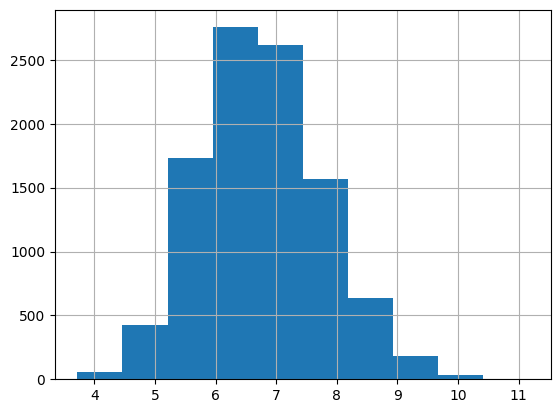

In [16]:
### histogram plot

estimate_df['estimate'].hist()

In [17]:

standard_error = Sample_data['aqi'].std() / np.sqrt(len(Sample_data))
standard_error

np.float64(0.7413225908290325)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

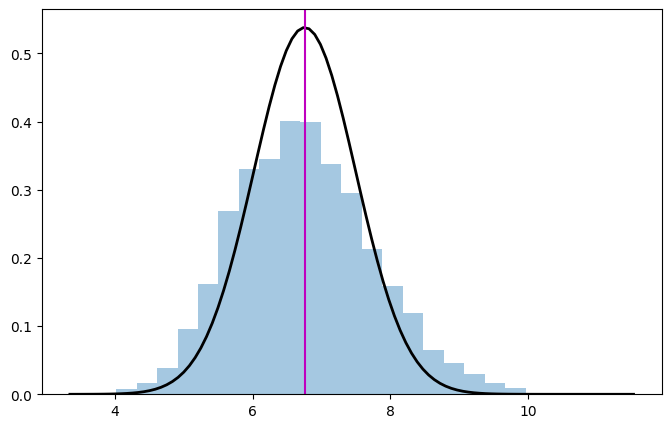

In [18]:
 # Generate a grid of 100 values from xmin to xmax.

plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, pop_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=pop_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=Sample_mean1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=means_0f_sample_mean, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend()
plt.show()

In [19]:
# Explore the `aqi` DataFrame.

print(epa_data.describe(include= "all"))
print(epa_data['state_name'].value_counts())

        date_local  state_name  county_name      city_name local_site_name  \
count          260         260          260            260             257   
unique           1          52          149            190             253   
top     2018-01-01  California  Los Angeles  Not in a city         Kapolei   
freq           260          66           14             21               2   
mean           NaN         NaN          NaN            NaN             NaN   
std            NaN         NaN          NaN            NaN             NaN   
min            NaN         NaN          NaN            NaN             NaN   
25%            NaN         NaN          NaN            NaN             NaN   
50%            NaN         NaN          NaN            NaN             NaN   
75%            NaN         NaN          NaN            NaN             NaN   
max            NaN         NaN          NaN            NaN             NaN   

         parameter_name   units_of_measure  arithmetic_mean    